<a href="https://colab.research.google.com/github/kimjeongsoo20190147/fisa04/blob/main/0227_ML07_%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 차원의 저주(The curse of dimensionality)

- 딥러닝의 시대가 열리고 층을 깊게 쌓을수록 차원이 커져 비선형성이 더 커지고 더 복잡한 feature를 이용한 성능 향상이 있을것이라 생각했지만 예상과는 다르게 차원이 일정 수준 이상 커지게 되면 학습데이터 수가 차원의 수보다 적어 성능이 저하되는 현상이 일어났다.

- 20%의 공간을 채우기 위한 전체 집단에서의 데이터의 비율은?
- 차원이 증가할 수록 개별 차원 내 학습할 데이터 수가 적어지는 현상을 sparse(희소) 현상이라고 한다.

![](https://images.deepai.org/glossary-terms/curse-of-dimensionality-61461.jpg)
- https://images.deepai.org/glossary-terms/curse-of-dimensionality-61461.jpg


- 따라서 학습이 제대로 이루어지지 않는 것이다.
- 해결법? 차원을 줄이거나 데이터를 많이 획득해야 함
- 차원이 커질수록 연산량이 기하급수적으로 증가하기 때문에 효율의 측면에서도 차원의 저주는 경계해야 함


In [ ]:
# y = ax1 + bx2 + w0
      2       5
# 170   82.5   300
# 160   75     250
# 150   72.6   200

# 주성분 분석(Principal Component Analysis, PCA)
- 가장 널리 사용되는 차원 축소 기법 중 하나로, 원 데이터의 분포를 최대한 보존하면서 고차원 공간의 데이터들을 저차원 공간으로 변환

![](https://t1.daumcdn.net/cfile/tistory/99CB343359F2DA5E07)
https://t1.daumcdn.net/cfile/tistory/99CB343359F2DA5E07

- 여러 변수간에 존재하는 상관 관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 기법
- 차원 축소시 기존 데이터의 정보 유실이 최소화
- PCA를 선형대수 관점에서 해석시, 입력 데이터의 공분산 행렬(Covariance Matrix)을 고유값 분해후
구해진 고유벡터에 입력 데이터를 선형 변환하는 것 의미, 이  고유 벡터가 PCA의 주성분 벡터로서 입력 데이터의 분산이 큰 방향을 나타냄

- PCA의 내부적 순서

    1) 학습 데이터셋에서 분산이 최대인 축(axis)을 찾는다.

    2) 이렇게 찾은 첫번째 축과 직교(orthogonal)하면서 분산이 최대인 두 번째 축을 찾는다.

    3) 첫 번째 축과 두 번째 축에 직교하고 분산을 최대한 보존하는 세 번째 축을 찾는다.

    4) 1~3과 같은 방법으로 데이터셋의 차원(특성 수)만큼의 축을 찾는다.


- 추천 참고 자료 : https://angeloyeo.github.io/2019/07/27/PCA.html



<hr>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
# 사이킷런 내장 데이터 셋 API 호출
from sklearn.datasets import load_iris

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
iris = load_iris()

irisDF = pd.DataFrame(iris.data, columns=iris.feature_names)
irisDF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**1. 4차원의 붓꽃 데이터를 2차원으로 압축**

4개의 속성을 2개의 PCA 차원으로 압축

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=121) # 원래 n개 축을 2개로 바꾸겠음

# fit, transform
iris_pca = pca.fit_transform(irisDF) # 비지도학습이므로 feature만 넘겨주면


In [ ]:
dir(pca)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_n_features_out',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_transform',

In [ ]:
print(f'n_component{pca.n_components_}') # 2  2개로 줄였어
# print(f'n_features_{pca.n_features_}') # 4  4개의 차원을
print(f'n_features_{pca.n_features_in_}') # 4
print(f'feature_nam{pca.feature_names_in_}') # ['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)' 'petal width (cm)']
print(f'n_samples_){pca.n_samples_}') # 150 150개 데이터가 들어있었어
print(f'explained_v{pca.explained_variance_}') # [4.22824171 0.24267075]  # 1번째축의 분산, 2번째축의 분산
print(f'explained_v{pca.explained_variance_ratio_}') # [0.92461872 0.05306648] # 92.4%, 5.3%를 캡처했음 -> 97.7% 정도 데이터 보존 2.3% 정도 데이터 손실
print(f'components_{pca.components_}') # [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]  [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]

print(f'noise_varia{pca.noise_variance_}') # 0.05
print(f'singular_va{pca.singular_values_}') # [25.09996044  6.01314738]

n_component2
n_features_4
feature_nam['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)']
n_samples_)150
explained_v[4.22824171 0.24267075]
explained_v[0.92461872 0.05306648]
components_[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]
noise_varia0.05102229650817691
singular_va[25.09996044  6.01314738]


In [ ]:
iris_pca

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [ ]:
# 1. 특성의 차원을 줄일 때 -> 몇 퍼센트의 손실이 일어나는가


<hr>

**2. PCA 적용전 개별 속성 스케일링**


- PCA는 여러 속성의 값을 연산해야 하므로 속성의 스케일에 영향을 받음
- **여러 속성을 PCA로 압축하기 전에 각 속성값을 동일한 스케일로 변환하는 것이 필요**
- 평균이 0, 분산이 1인 표준 정규 분포로 모든 속성값 변환

https://nicola-ml.tistory.com/4?category=806493 <br>

https://nicola-ml.tistory.com/3

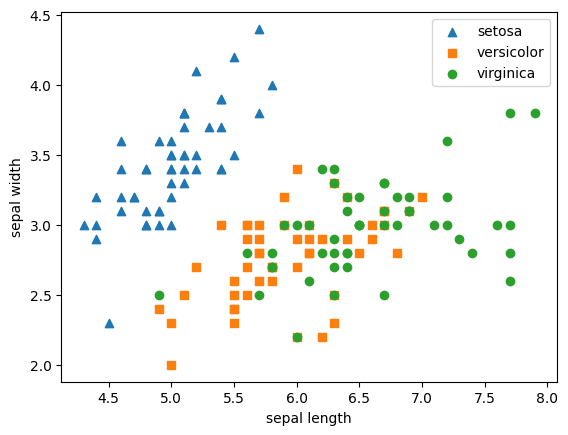

In [ ]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
# 2차원으로 시각화, 품종 데이터 분포

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
# 반복문을 수행해서 각 target별 matplotlib로 시각화
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()


**2개의 속성으로 PCA 변환된 데이터 셋트를 2차원상에서 시각화**

모델링하는 개발자가 직접 차원축소를 한 경우 실행결과와 PCA API로 수행한 결과의 분포 확인

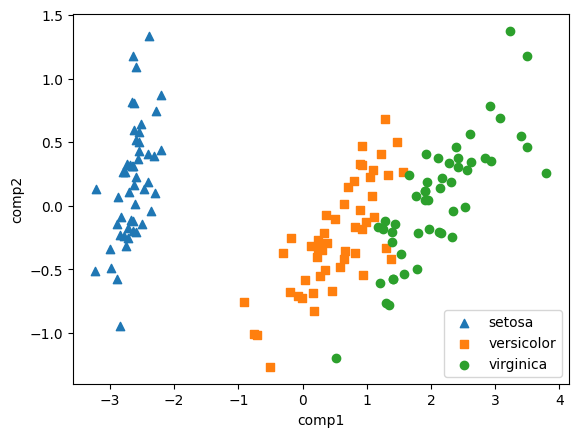

In [ ]:
columns = ['comp1','comp2']
iris_pca_DF = pd.DataFrame(iris_pca, columns=columns)
iris_pca_DF['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
# 2차원으로 시각화, 품종 데이터 분포

markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
# 반복문을 수행해서 각 target별 matplotlib로 시각화
for i, marker in enumerate(markers):
    x_axis_data = iris_pca_DF[iris_pca_DF['target']==i]['comp1']
    y_axis_data = iris_pca_DF[iris_pca_DF['target']==i]['comp2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('comp1')
plt.ylabel('comp2')
plt.show()


<hr>

**원본 데이터와 PCA로 2차원 데이터로 변환된 데이터 셋으로 모델링 하기**

- Estimator로 RandomForestClassifierRandomForestClassifier 사용
- 참고 : PCA 변환된 데이터 세트가 원본 데이터 세트보다 더 나은 예측 정확도 나타내는 경우는 흔하진 않음. 그러나 차원 축소로 인한 효과로 이를 상쇄

In [ ]:
irisDF.iloc[:, :-1].head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.model_selection import cross_val_score

# 4개 특성을 다 넘겨줌
 rfc = RandomForestClassifier(random_state=121)
 cross_val_score(rfc, irisDF.iloc[:, :-1], irisDF.iloc[:, -1], cv=5).mean()
 # 0.96

0.96

In [ ]:
# 4개 특성을 다 넘겨줌
rfc = RandomForestClassifier(random_state=121)
cross_val_score(rfc, iris_pca_DF.iloc[:, :-1], iris_pca_DF.iloc[:, -1], cv=5).mean()
 # 0.933      PCA해서 4개 특성을 2개로 줄인 효과보다 2.3% 손실이 더 큰 영향을 미쳐서 성능이 떨어졌구나


0.9333333333333333

In [ ]:
# 1. scaling하고 pca를 하면 더 데이터의 분포를 잘 캡처할 수 있나?
from sklearn.preprocessing import StandardScaler

# 1. 스케일링 적용
sc = StandardScaler()
X_scaled = sc.fit_transform(irisDF.iloc[:, :-1]) # X에만 적용

# 2. pca 적용 -
pca_scaled = PCA(n_components=2, random_state=121)
X_pca_scaled = pca_scaled.fit_transform(X_scaled)

# 3. 모델에 학습, 평가 교차검증
rfc = RandomForestClassifier(random_state=121)
cross_val_score(rfc, X_pca_scaled, iris_pca_DF.iloc[:, -1], cv=5).mean()

# 0.8933333333333333

0.8933333333333333

In [ ]:
print(f'n_component{pca_scaled.n_components_}') # 2  2개로 줄였어
# print(f'n_features_{pca_scaled.n_features_}') # 4  4개의 차원을
print(f'n_features_{pca_scaled.n_features_in_}') # 4
# print(f'feature_nam{pca_scaled.feature_names_in_}') # ['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)' 'petal width (cm)']
print(f'n_samples_){pca_scaled.n_samples_}') # 150 150개 데이터가 들어있었어
print(f'explained_v{pca_scaled.explained_variance_}') # [4.22824171 0.24267075]  # 1번째축의 분산, 2번째축의 분산
print(f'explained_v{pca_scaled.explained_variance_ratio_}') # [0.92461872 0.05306648] # 92.4%, 5.3%를 캡처했음 -> 97.7% 정도 데이터 보존 2.3% 정도 데이터 손실
# 0.72962445 0.22850762 - 95% 정도의 데이터 분포를 캡처
print(f'components_{pca_scaled.components_}') # [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]  [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]

print(f'noise_varia{pca_scaled.noise_variance_}') # 0.05
print(f'singular_va{pca_scaled.singular_values_}') # [25.09996044  6.01314738]

n_component2
n_features_4
n_samples_)150
explained_v[2.93808505 0.9201649 ]
explained_v[0.72962445 0.22850762]
components_[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]
noise_varia0.08429784161070508
singular_va[20.92306556 11.7091661 ]


In [ ]:
iris_pca_DF.head()

,comp1,comp2,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0


In [ ]:
X_pca_scaled

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [ ]:
# 1. scaling하고 pca를 하면 더 데이터의 분포를 잘 캡처할 수 있나?  큰 차이가 있지는 않음
# 2. 축을 늘리면 실제로 데이터의 분포를 잘 가져오면서 손실이 덜 일어나나?

# 이미지데이터를 활용한 PCA

- 데이터 정규화 - Whitening 이라고도 하며, 데이터분포를 원점 기준으로 변경
- Covariance matrix 의 eigen value 와 eigen vector 를 계산하고 내림차순으로 정렬
- 주성분의 수에 따라 가장 큰 n개의 eigen value를 추출하고 대응하는 eigen vector의 기저공간으로 데이터를 사영함

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()



colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]
# 처음 두 개의 주성분으로 숫자 데이터를 변환합니다

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [ ]:
len(digits.data) # 1797개 손글씨 이미지

# 0에 가까울수록 어두운 색 255에 가까울수록 밝은색

1797

In [ ]:
digits.target # 클래스별로 균등한지 O

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
np.unique(digits.target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))

In [ ]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
# DF 만드는 이유 - 각 특성의 특징을 사람이 알아보기 좋게 관리하기 위해 만들었었습니다.
# 이미지, 영상, 음성 같은 비정형데이터들은 DF으로 만들지 않습니다.

In [ ]:
# 1. scaling하고 pca를 하면 더 데이터의 분포를 잘 캡처할 수 있나?
from sklearn.preprocessing import StandardScaler

# # 1. 스케일링 적용
# sc = StandardScaler()
# X_scaled = sc.fit_transform(irisDF.iloc[:, :-1]) # X에만 적용

# # 2. pca 적용 -
# pca_scaled = PCA(n_components=2, random_state=121)
# X_pca_scaled = pca_scaled.fit_transform(X_scaled)

# 3. 모델에 학습, 평가 교차검증
rfc = RandomForestClassifier(random_state=121)
cross_val_score(rfc, digits.data, digits.target, cv=5).mean()

# 0.9382544103992572

0.9382544103992572

In [ ]:
%%timeit
# 1. scaling하고 pca를 하면 더 데이터의 분포를 잘 캡처할 수 있나?
from sklearn.preprocessing import StandardScaler

# 2. pca 적용 -
pca_scaled = PCA(n_components=15, random_state=121)
X_pca_scaled = pca_scaled.fit_transform(digits.data)

# 3. 모델에 학습, 평가 교차검증
rfc = RandomForestClassifier(random_state=121)
cross_val_score(rfc, X_pca_scaled, digits.target, cv=5).mean()

# 0.9337929433611885

3.46 s ± 703 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
print(f'n_component{pca_scaled.n_components_}')
# print(f'n_features_{pca_scaled.n_features_}')
print(f'n_features_{pca_scaled.n_features_in_}')
# print(f'feature_nam{pca_scaled.feature_names_in_}')
print(f'n_samples_){pca_scaled.n_samples_}')
print(f'explained_v{pca_scaled.explained_variance_}')
print(f'explained_v{pca_scaled.explained_variance_ratio_}')
print(f'components_{pca_scaled.components_}')
print(f'noise_varia{pca_scaled.noise_variance_}')
print(f'singular_va{pca_scaled.singular_values_}')

n_component15
n_features_64
n_samples_)1797
explained_v[179.0069301  163.71774688 141.78843909 101.1003752   69.51316559
  59.10852489  51.88453911  44.01510667  40.31099529  37.0117984
  28.51904118  27.32116981  21.90148814  21.32435654  17.63672222]
explained_v[0.14890594 0.13618771 0.11794594 0.08409979 0.05782415 0.0491691
 0.04315987 0.03661373 0.03353248 0.03078806 0.02372341 0.02272697
 0.01821863 0.01773855 0.01467101]
components_[[ 0.00000000e+00 -1.73094651e-02 -2.23428835e-01 -1.35913304e-01
  -3.30323092e-02 -9.66340844e-02 -8.32943805e-03  2.26900082e-03
  -3.20516495e-04 -1.19308905e-01 -2.44451676e-01  1.48512745e-01
  -4.67319410e-02 -2.17740744e-01 -1.48136776e-02  4.47779518e-03
  -4.94136398e-05 -7.95419375e-02  8.33951454e-02  2.15915342e-01
  -1.72126801e-01 -1.63712098e-01  2.86444452e-02  4.23251803e-03
   9.85488574e-05  6.42319144e-02  2.54093316e-01 -3.56771026e-02
  -2.09462569e-01 -4.31311420e-02  5.13118688e-02  2.13422732e-04
   0.00000000e+00  1.59950883

In [ ]:
sum(pca_scaled.explained_variance_ratio_) # 0.9663542069634704

0.8353053364037439

## 중간과정을 보고 싶다면

In [ ]:
28 * 28

784

In [ ]:
import numpy as np
import scipy
import scipy.stats
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from ipywidgets import interact

plt.style.use('fivethirtyeight')


MNIST = fetch_openml('mnist_784', version=1)
images = MNIST['data'].to_numpy().astype(np.double) / 255.


# 1. Normalization
def normalize(X):
    N, D = X.shape
    mu = np.mean(X, axis=0)
    Xbar = X - mu
    return Xbar, mu


# 2. Covariance matrix 의 eigenvalue, eigenvector 계산
def eig(S):
    eig_vals, eig_vecs = np.linalg.eig(S)
    sort_indices = np.argsort(eig_vals)[::-1] # 내림차순 정렬
    return eig_vals[sort_indices], eig_vecs[:, sort_indices]


# 3. Principal components 에 해당하는 각 벡터의 기저공간에 데이터 사영
def reconstruct(X, PC):
    return (X @ PC) @ PC.T # vector projection 참고


# PCA 알고리즘
def PCA(images, num_components, num_data=1000):
    X = images[:num_data]
    N, D = X.shape

    # 1. Normalization
    X_normalized, mean = normalize(X)

    # 2. Covariance matrix 의 eigenvalue, eigenvector 계산
    S = (X_normalized.T @ X_normalized) / N
    eig_vals, eig_vecs = eig(S)

    # 3. Principal components 에 해당하는 각 벡터의 기저공간에 데이터 사영
    principal_vals, principal_components = np.real(eig_vals[:num_components]), np.real(eig_vecs[:,:num_components])

    reconst_X = reconstruct(X_normalized, principal_components) + mean
    return reconst_X, mean, principal_vals, principal_components

In [ ]:
# PCA 데이터 압축 시각화

@interact(NUM_PC=(1, 200), continuous_update=False)
def plot_pca_images(NUM_PC=15):
    num_images_to_show = 10
    reconst_X, _, _, _ = PCA(images, NUM_PC)

    origin_image = np.reshape(images[:num_images_to_show], (-1, 28, 28))
    reconst_image = np.reshape(reconst_X[:num_images_to_show], (-1, 28, 28))
    fig, ax = plt.subplots(2, 1, figsize=(num_images_to_show * 3, 3))

    ax[0].imshow(np.concatenate(origin_image, -1), cmap="gray")
    ax[1].imshow(np.concatenate(reconst_image, -1), cmap="gray")

interactive(children=(IntSlider(value=15, description='NUM_PC', max=200, min=1), Output()), _dom_classes=('wid…

interactive(children=(IntSlider(value=500, description='image_idx', max=1000), Output()), _dom_classes=('widge…

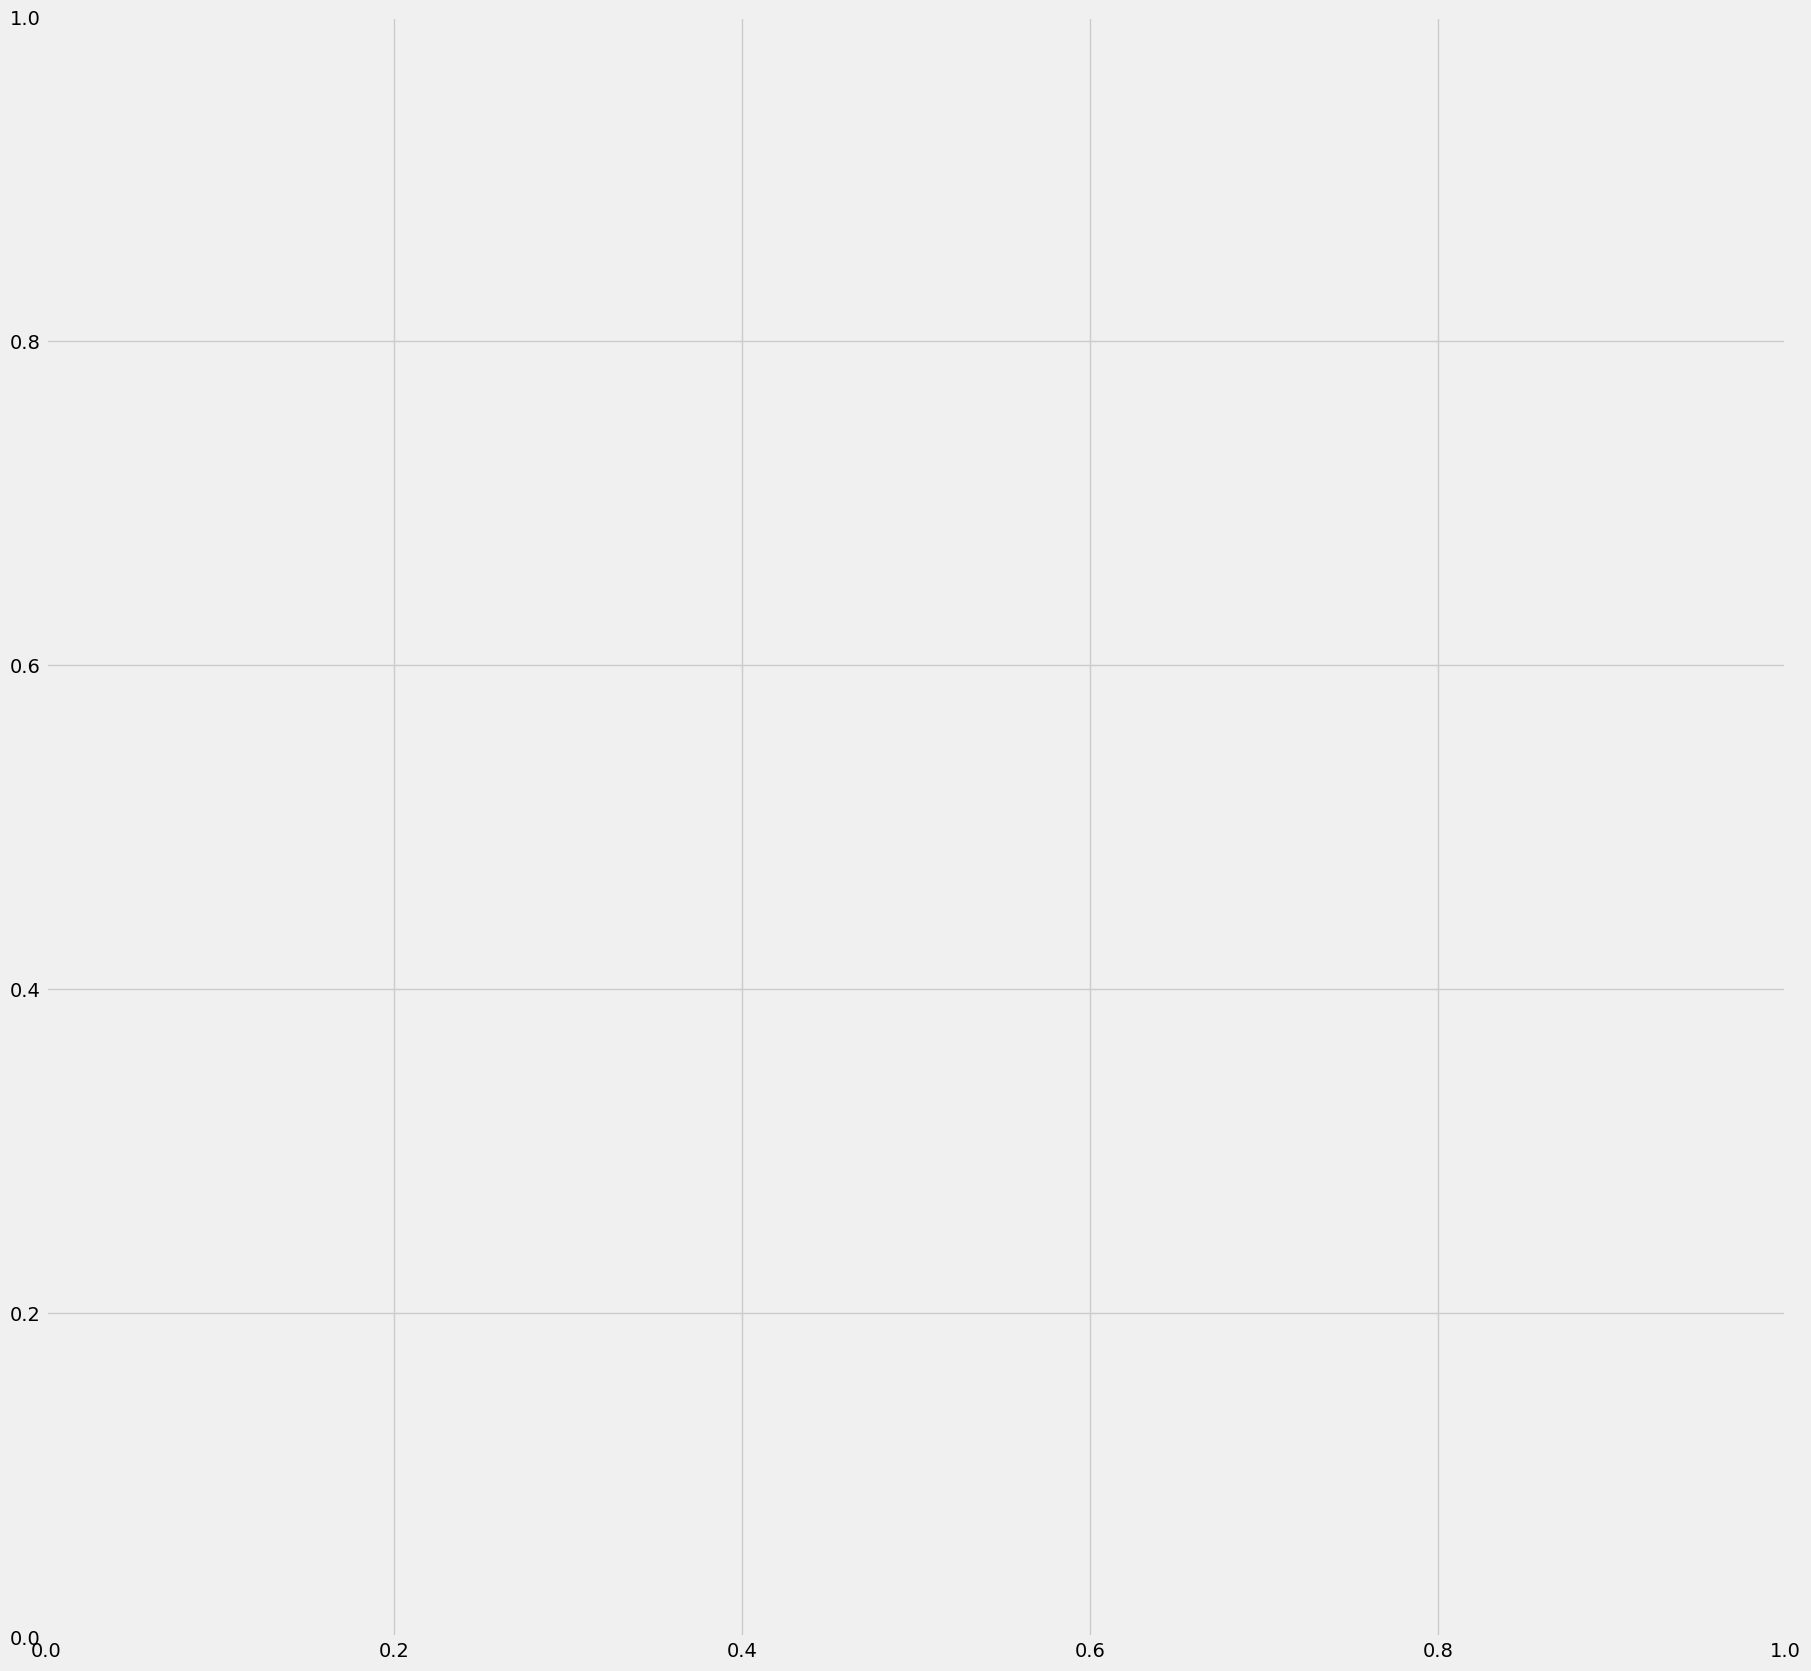

In [ ]:
@interact(image_idx=(0, 1000))
def show_num_components_reconst(image_idx):
    fig, ax = plt.subplots(figsize=(20., 20.))
    actual = X[image_idx]
    x = np.concatenate([actual[np.newaxis, :], reconstructions[:, image_idx]])
    ax.imshow(np.hstack(x.reshape(-1, 28, 28)[np.arange(10)]), cmap='gray');
    ax.axvline(28, color='orange', linewidth=2)

n = 1, reconstruction_error = 46.465431
n = 6, reconstruction_error = 31.284116
n = 11, reconstruction_error = 24.259506
n = 16, reconstruction_error = 19.831531
n = 21, reconstruction_error = 16.731753
n = 26, reconstruction_error = 14.364567
n = 31, reconstruction_error = 12.488758
n = 36, reconstruction_error = 11.002660
n = 41, reconstruction_error = 9.782333
n = 46, reconstruction_error = 8.774709
n = 51, reconstruction_error = 7.918999
n = 56, reconstruction_error = 7.187890
n = 61, reconstruction_error = 6.558557
n = 66, reconstruction_error = 6.020713
n = 71, reconstruction_error = 5.540953
n = 76, reconstruction_error = 5.120755
n = 81, reconstruction_error = 4.744785
n = 86, reconstruction_error = 4.418276
n = 91, reconstruction_error = 4.122307
n = 96, reconstruction_error = 3.853247


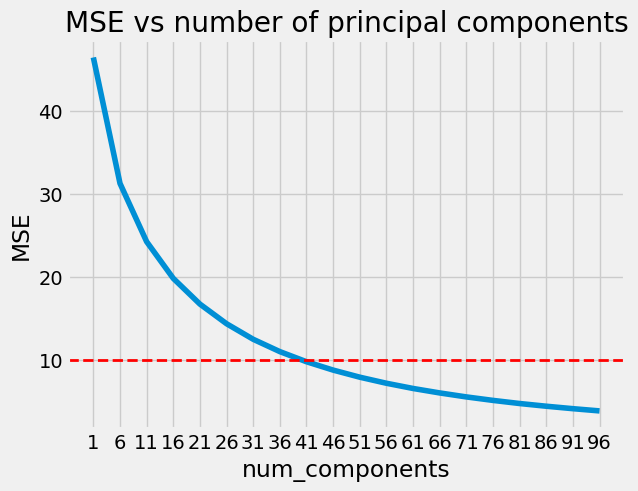

In [ ]:
def mse(predict, actual):
    return np.square(predict - actual).sum(axis=1).mean()


loss = []
reconstructions = []

for num_component in range(1, 100, 5):
    X = images[:1000]
    reconst, _, _, _ = PCA(X, num_component)
    error = mse(reconst, X)
    reconstructions.append(reconst)
    print('n = {:d}, reconstruction_error = {:f}'.format(num_component, error))
    loss.append((num_component, error))

reconstructions = np.asarray(reconstructions)
reconstructions = reconstructions
loss = np.asarray(loss)

# MSE 시각화
fig, ax = plt.subplots()
ax.plot(loss[:,0], loss[:,1]);
ax.axhline(10, linestyle='--', color='r', linewidth=2)
ax.xaxis.set_ticks(np.arange(1, 100, 5));
ax.set(xlabel='num_components', ylabel='MSE', title='MSE vs number of principal components');

# 주성분 개수에 따른 원본데이터 대비 MSE 값을 계산하여 그래프를 그려보니 특정 임계치(MSE=10) 기준으로 41개 근방에서 기울기가 완만해짐
# 따라서 데이터압축 시 41개 이하의 주성분으로도 충분히 데이터복원이 가능. (참고로 원본이미지 데이터의 차원수는 28 * 28 = 784 이다.)

https://www.youtube.com/watch?v=4UNlDjWV3ls

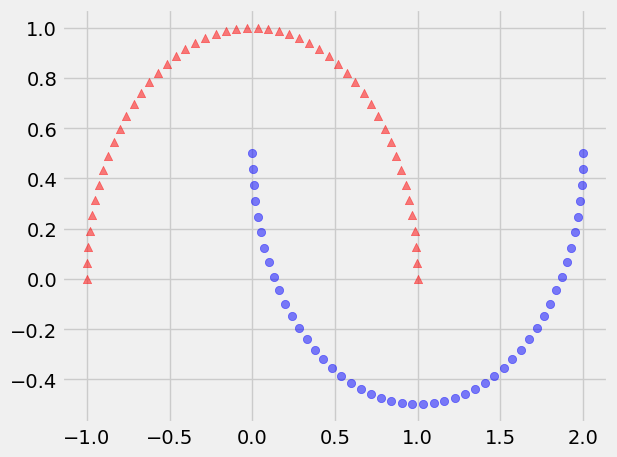

In [ ]:
# PCA는 데이터를 선형으로 계산할 수 있는 축을 N개 만듭니다.
# 비선형으로 패턴을 가진 데이터를 분류하기에 애매한 지점들이 생겨납니다.
# 커널기법을 사용해서 데이터들을 더 높은 차원으로 보내서 직선을 찾습니다.
# 그리고 다시 낮은 차원으로 바꿔서 차원을 축소합니다. - 계산속도는 약간 걸리지만 비선형 경계를 찾아서 분류, 회귀를 할 때 훨씬 큰 효과를 발휘
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, random_state=123)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='o', alpha=0.5)

plt.tight_layout()
# plt.savefig('images/05_12.png', dpi=300)
plt.show()


In [ ]:

from sklearn.decomposition import PCA
import numpy as np

scikit_pca = PCA(n_components=1)
X_spca = scikit_pca.fit_transform(X)

In [ ]:
scikit_pca.explained_variance_ratio_ # 19

array([0.81968748])

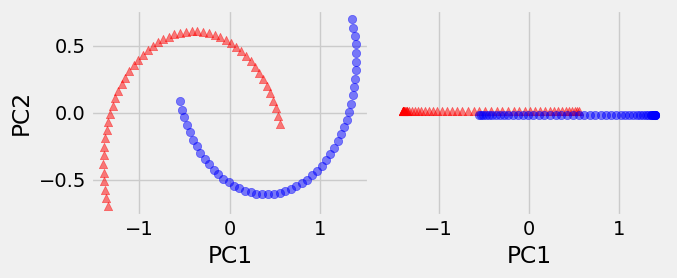

In [ ]:

from sklearn.decomposition import PCA
import numpy as np

scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_spca[y == 0, 0], np.zeros((50, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((50, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
# plt.savefig('images/05_13.png', dpi=300)
plt.show()

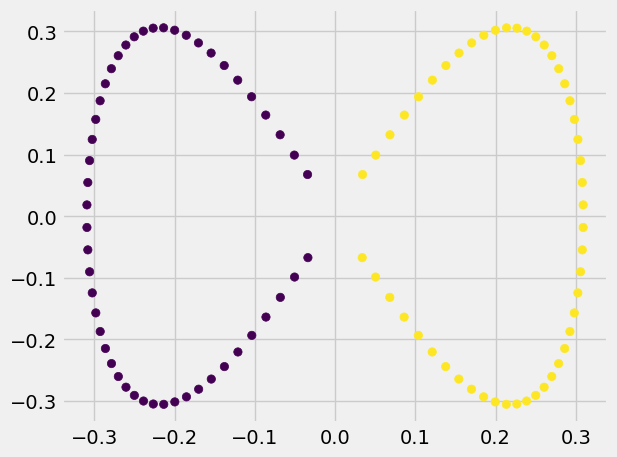

In [ ]:

from sklearn.decomposition import KernelPCA
import numpy as np

scikit_pca = KernelPCA(n_components=2, kernel='rbf', gamma=30) # 각 데이터포인트에 중점을 둬서 계산하게 만드느 파라미터
X_spca = scikit_pca.fit_transform(X)

plt.scatter(X_spca[:, 0],X_spca[:, 1],  c=y)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')



plt.tight_layout()
# plt.savefig('images/05_13.png', dpi=300)
plt.show()

# 매니폴드 학습(manifold learning)
-  다양체라고도 하며 국소적으로 유클리드 공간과 닮은 위상 공간
![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile4.uf.tistory.com%2Fimage%2F996B663A5B8A488F2FDA98)

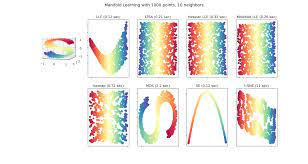
- 시각화 알고리즘으로 훨씬 복잡한 매핑을 만들어 더 나은 시각화를 제공합니다. (t-SNE 알고리즘을 많이 사용)
-  시각화를 목적으로 하기에 주로 2개 정도의 특성을 뽑음. 일부 매니폴드 알고리즘은 훈련 데이터는 새로운 표현으로 변환시키지만 새로운 데이터에는 적용할 수 없음.

- t-SNE는 t-Distributed Stochastic Neighbor Embedding의 약자

Text(0, 0.5, '2st PC')

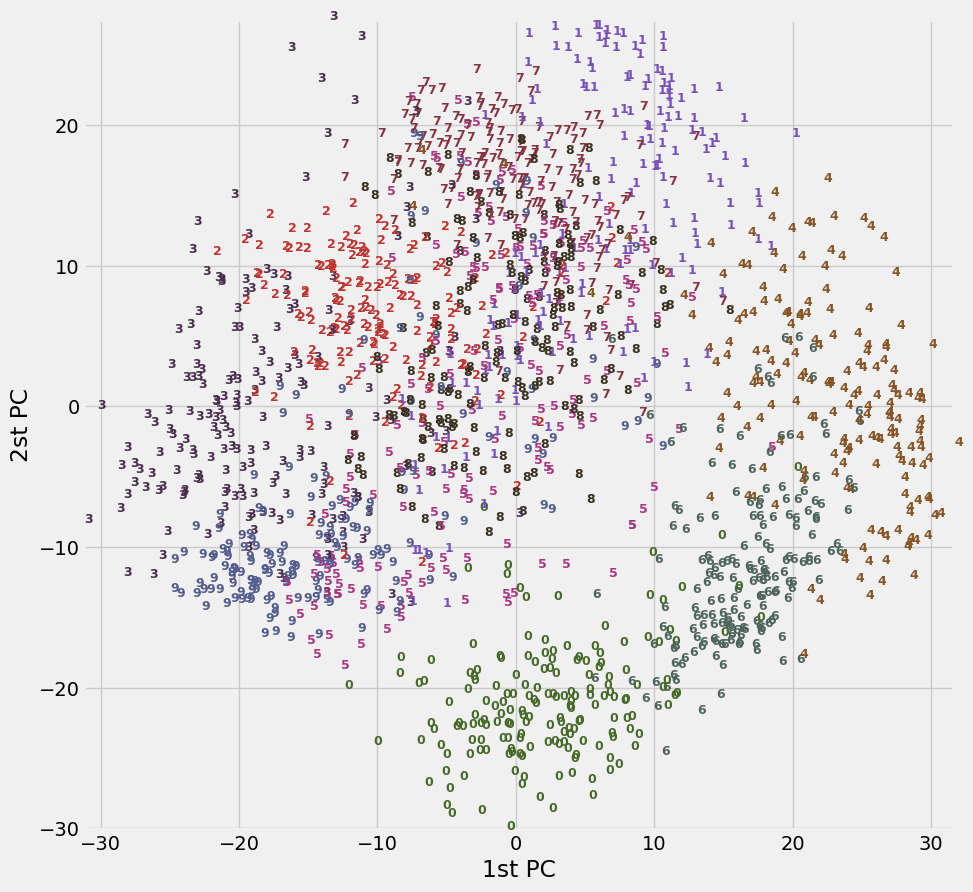

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()

# PCA 모델을 생성합니다
pca = PCA(n_components=2)
pca.fit(digits.data)
# 처음 두 개의 주성분으로 숫자 데이터를 변환합니다
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그립니다
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("1st PC")
plt.ylabel("2st PC")


In [ ]:
sum(pca.explained_variance_ratio_)

0.28509364823699296

Text(0.5, 0, 't-SNE feature 1')

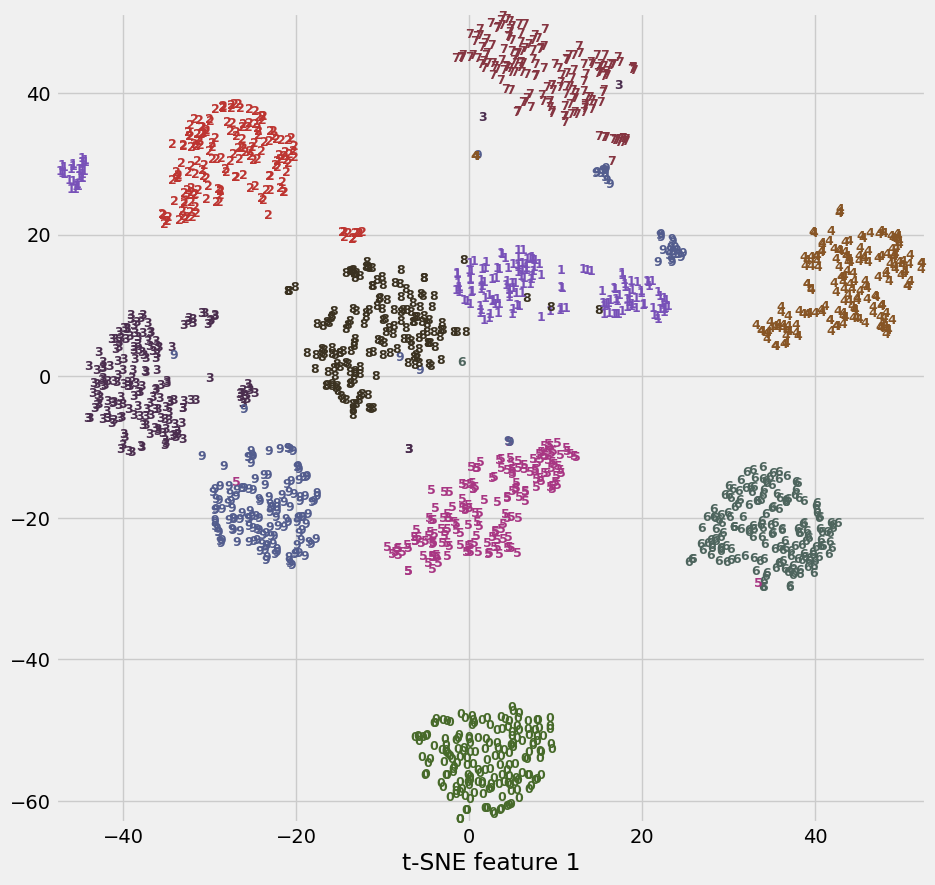

In [ ]:
##############################################################################

# 데이터 사이의 거리가 최대한 많이 몰려있는 쪽으로 유지하면서 축을 떠오는 방법
# 커널pca는 차원을 하나 올려서 계산하고 아래로 내립니다.

from sklearn.manifold import TSNE # 시각화에 최적화된 PCA 기법 -> 2차원으로 만들어줌


tsne = TSNE(n_components=2, random_state=121)
digits_tsne = tsne.fit_transform(digits.data)


plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그립니다
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")


In [ ]:
tsne.embedding_ # 숫자로 표현할 수 없는 값들을 수치화한 것

array([[ -2.932808 , -53.909676 ],
       [ 10.082214 ,  12.013242 ],
       [-13.963999 ,  18.919048 ],
       ...,
       [ -6.1447616,  11.057058 ],
       [-21.135479 , -15.27073  ],
       [-14.334167 ,   7.2390094]], dtype=float32)

In [ ]:
# 쿨백-라이블러 발산
tsne.kl_divergence_ # 0.75 : 실제값과 그 값을 n개의 축으로 수렴시킨 두 데이터의 확률분포가 얼마나 다른지를 알려주는 지표
# 0에 가까울수록 원본(64차원)일 때와 2차원으로 축소했을 때 근사하게 될 거고 값이 클 수록 거리가 있는지를 나타낸다


0.7537539601325989

# 고유얼굴(eigenface) 특성 추출
-  PCA를 이용하여 LFW(Labeled Faced in Wild) 데이터셋의 얼굴 이미지에서 특성을 추출
- 2000년 초반 이후의 정치인, 가수, 배우, 운동선수들의 얼굴을 포함

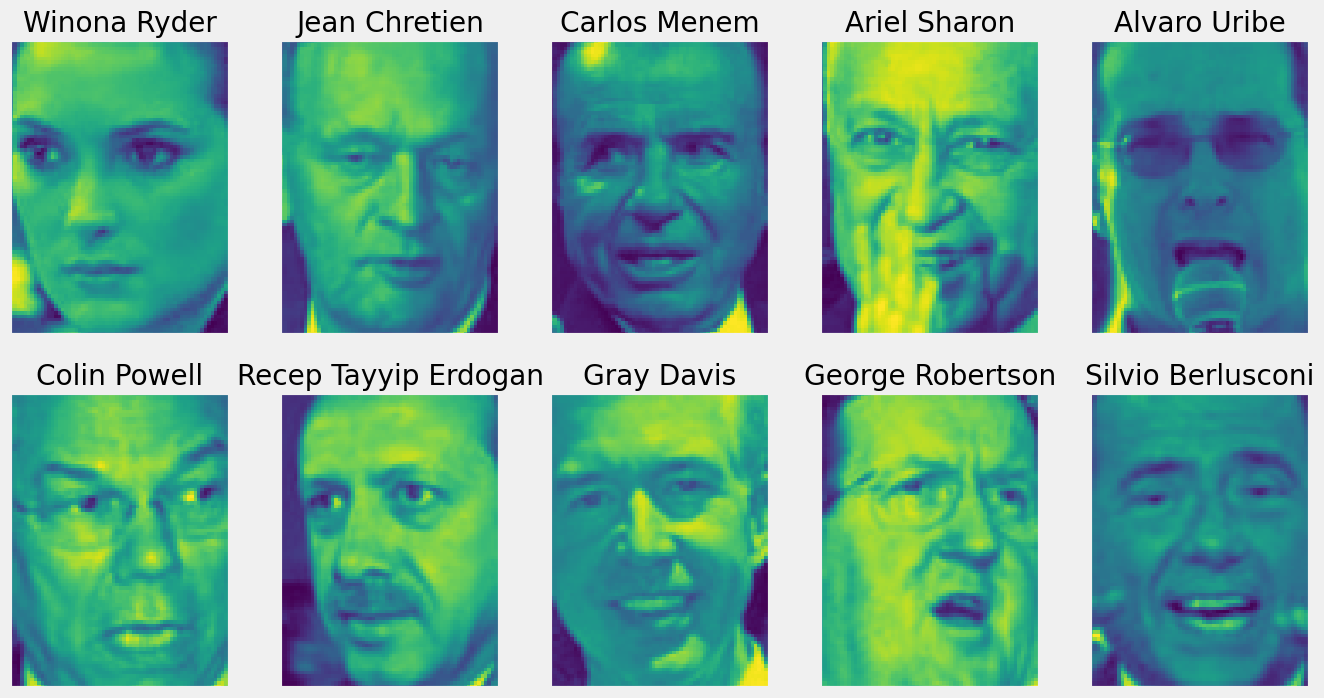

In [ ]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize= 0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks':(), 'yticks':()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

plt.show()

- 62명의 얼굴을 찍은 이미지가 총 3023개가 있으며 크기는 87 * 65 픽셀

In [ ]:
people.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [ ]:
len(people.data) # 3023

3023

In [ ]:
 # 87 * 65   5655

5655

In [ ]:
people.data[0]

array([0.22352941, 0.23137255, 0.29411766, ..., 0.06797386, 0.06405229,
       0.09150327], dtype=float32)

In [ ]:
len(people.images[0][0]) #  87 X 65

65

In [ ]:
people.target

array([61, 25,  9, ..., 14, 15, 14])

In [ ]:
len(people.target_names) # 62명의 이미지

62

In [ ]:
print(people.DESCR)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenCV li

In [ ]:
# 각 클래스의 분포 확인 - 불균등한 분포
np.unique(people.target, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
 array([ 39,  35,  21,  36,  20,  77,  42,  24,  29,  21, 236,  31, 121,
         22, 530, 109,  44,  26,  30,  22,  39,  71,  20,  28,  52,  55,
         21,  42,  21,  24,  20,  53,  31,  23,  28,  60,  32,  41,  22,
         41,  48,  29,  33,  20,  22,  37,  20,  22,  30,  27,  32,  26,
         23,  52,  33,  23,  25,  33, 144,  32,  49,  24]))

In [ ]:
# people.target#  에서 20장을 넘어가는 target은 무시하도록 앞에서부터 20개만 True, 그 뒤는 False를 리턴하는 마스크 벡터를 만들어줄겁니다.

mask = np.zeros(people.target.shape, dtype=bool)

# 각 클래스별로 앞에서부터 20개씩만 이미지를 추려오게 될 겁니다.
for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:20]] = 1


In [ ]:
# X, y를 같은 인덱스로 묶어서 관리하기 위해 mask라는 행렬을 사용하는 셈
X_people = people.data[mask]
y_people = people.target[mask]

np.unique(y_people, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
 array([20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
        20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
        20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
        20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]))

In [ ]:
87 * 65

5655

In [ ]:
62* 20 # 1240장으로 5655차원짜리 데이터를 학습시켜야 하는 차원의 저주....

1240

In [ ]:
1/62 # 1.6% 보다 정확해야 할 거구요

0.016129032258064516

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, random_state=121, stratify=y_people, test_size=0.2)

knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
knc.score(X_test, y_test) # 0.173

0.17338709677419356

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression() # 데이터가 많이 없음. 차원은 많음.
lr.fit(X_train, y_train)
lr.score(X_test, y_test)  # 0.459

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.4596774193548387

Optimal number of components for 80% variance: 38
Optimal number of components for 95% variance: 182


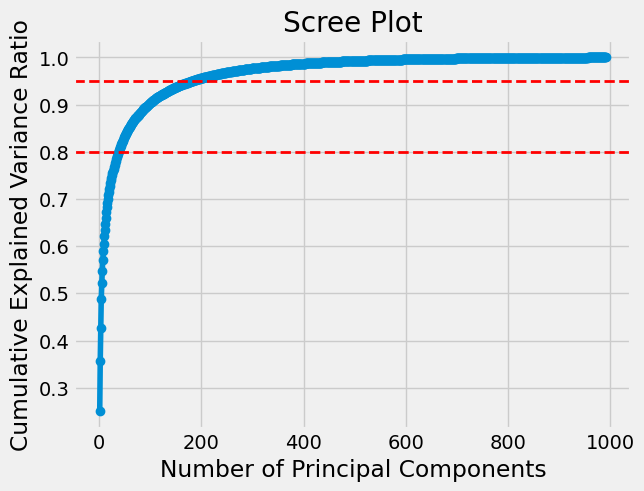

In [ ]:
# 보통 80% 넘으면 ok, 95% 정도를 캡처한다면 데이터 손실이 거의 없다 라고 이야기합니다.
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Scree plot : PCA 분석 후 주성분 수를 선정하기 위해 고유값-주성분의 분산 변화를 보는 그래프로, 고유값 변화율이 완만해지는 부분이 필요한 주성분의 수로 간주합니다.

X = X_train  # 1000개의 이미지 데이터

# PCA 수행 및 누적 설명된 분산 비율 계산
pca = PCA()  # 원본 데이터 차원 수가 5885
pca.fit(X)

# 각 주성분의 설명된 분산 비율과 누적 설명된 분산 비율 계산
explained_variance_ratio = pca.explained_variance_ratio_  # 각 주성분이 설명하는 분산 비율
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)  # 누적 설명된 분산 비율

# Scree Plot 그리기
fig, ax = plt.subplots()
ax.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
ax.axhline(y=0.80, linestyle='--', color='r', linewidth=2)
ax.axhline(y=0.95, linestyle='--', color='r', linewidth=2)
ax.set_xlabel('Number of Principal Components')
ax.set_ylabel('Cumulative Explained Variance Ratio')
ax.set_title('Scree Plot')

optimal_components = np.argmax(cumulative_variance_ratio >= 0.80) + 1  # 95% 이상 설명하는 주성분 개수
print(f'Optimal number of components for 80% variance: {optimal_components}')

# 95% 분산 비율을 설명하는 주성분 개수 찾기
optimal_components1 = np.argmax(cumulative_variance_ratio >= 0.95) + 1  # 95% 이상 설명하는 주성분 개수
print(f'Optimal number of components for 95% variance: {optimal_components1}')

plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, random_state=121, stratify=y_people, test_size=0.2)

pca = PCA(n_components=182)
X_train_pca = pca.fit_transform(X_train) # X_train의 고유값, 고유행렬
X_test_pca = pca.transform(X_test)

knc = KNeighborsClassifier()
knc.fit(X_train_pca, y_train)
knc.score(X_test_pca, y_test) # 0.173  0.173387096774193560.  - .1895 - 1814516

0.18951612903225806

In [ ]:
sum(pca.explained_variance_ratio_)

0.8826551277888939

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, random_state=121, stratify=y_people, test_size=0.2)

pca = PCA(n_components=250)
X_train_pca = pca.fit_transform(X_train) # X_train의 고유값, 고유행렬
X_test_pca = pca.transform(X_test)

lr = LogisticRegression() # 데이터가 많이 없음. 차원은 많음.
lr.fit(X_train_pca, y_train)
lr.score(X_test_pca, y_test)  # 0.459


0.4435483870967742

In [ ]:
pca.explained_variance_ratio_[:15]

array([0.25113362, 0.10538216, 0.06991987, 0.06239722, 0.03240764,
       0.0268694 , 0.02366508, 0.01764264, 0.0157984 , 0.01569369,
       0.01401898, 0.01297549, 0.0125469 , 0.01221723, 0.00997829],
      dtype=float32)

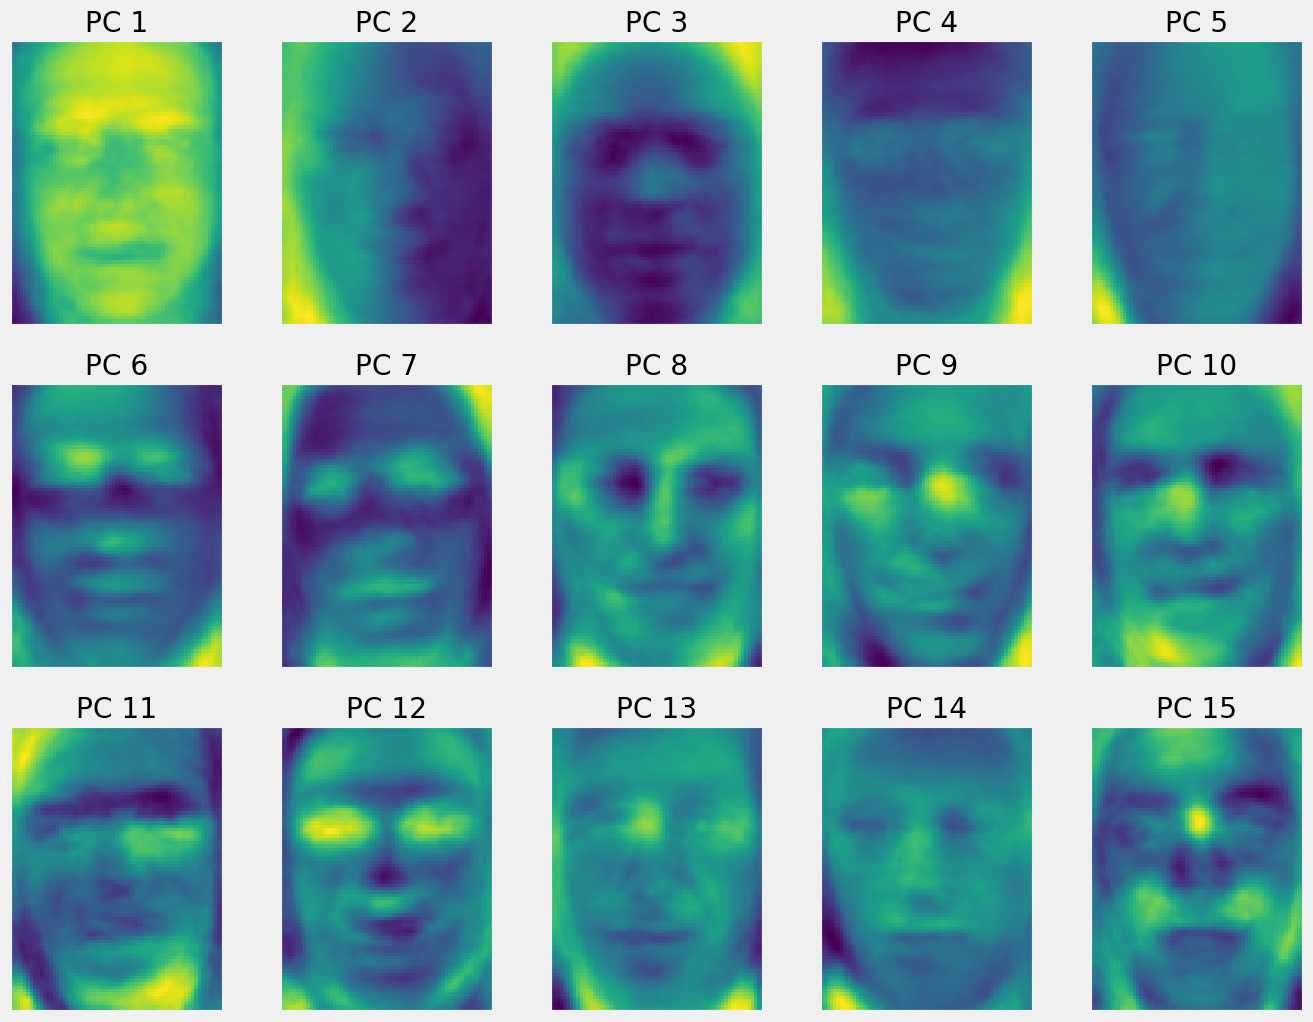

In [ ]:
fig, axes = plt.subplots(3,5, figsize=(15,12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("PC {}".format(i+1))

# 위스콘신 유방암 데이터셋으로 PCA
파이프라인을 사용한 효율적인 Workflow


위스콘신 유방암 데이터셋 - 악성과 양성인 종양 세포 샘플 569개

- 첫 2열 : 샘플의 고유 ID 번호와 진단 결과(M=악성,B=양성)
- 3~32번째 열 : 세포 핵의 디지털 이미지에서 계산된 30개의 실수 값 특성 => 종양이 악성인지 양성인지 예측하는 모델 만들기

- 주성분 분석을 통해 초기 30차원에서 좀 더 낮은 2차원 부분 공간으로 데이터를 압축

- StandardScaler, PCA, LogisticRegression 객체를 하나의 파이프라인으로 연결
- make_pipeline 함수 : 여러 개의 사이킷런 변환기와 그 뒤에 fit 메서드와 predict 메서드를 구현한 사이킷런 추정기를 연결 가능 -> 입력으로 받은 객체들을 사용하여 사이킷런의 Pipeline 클래스 객체를 생성하여 반환

In [ ]:
# 순서대로 전처리 -> 모델의 판별
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['label'] = cancer.target

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
# 데이터 수집 -> 전처리 -> 모델 학습 -> 평가 -> 앞의과정에서 부족한 부분 재수행하면서 모델의 추론결과를 높이는
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

# 데이터를 train, test 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=121)

# 모델의 하이퍼 파라미터를 GridSearchCV 로 찾거나
# 모델을 서빙 -> Scaler -> PCA -> 모델

# 순서대로 각 객체를 넣어줍니다.
pipeline_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression())

pipeline_lr.fit(X_train, y_train) # 학습
pipeline_lr.score(X_test, y_test) # 성능측정

0.9912280701754386

,134
mean radius,18.450000
mean texture,21.910000
mean perimeter,120.200000
mean area,1075.000000
mean smoothness,0.094300
mean compactness,0.097090
mean concavity,0.115300
mean concave points,0.068470
mean symmetry,0.169200
mean fractal dimension,0.057270


In [ ]:
pipeline_lr.predict(pd.DataFrame(X_test.iloc[0]).T)

array([0])

In [ ]:
X_test.values[0], y_test.values[0]

(array([1.845e+01, 2.191e+01, 1.202e+02, 1.075e+03, 9.430e-02, 9.709e-02,
        1.153e-01, 6.847e-02, 1.692e-01, 5.727e-02, 5.959e-01, 1.202e+00,
        3.766e+00, 6.835e+01, 6.001e-03, 1.422e-02, 2.855e-02, 9.148e-03,
        1.492e-02, 2.205e-03, 2.252e+01, 3.139e+01, 1.456e+02, 1.590e+03,
        1.465e-01, 2.275e-01, 3.965e-01, 1.379e-01, 3.109e-01, 7.610e-02]),
 0)

In [ ]:
pipeline_lr

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('logisticregression', LogisticRegression())])

In [ ]:
# # 모델의 하이퍼 파라미터를 GridSearchCV 로 찾거나

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 파이프라인 생성 (각 스텝을 명시적으로 정의)
pipe = Pipeline([
    ('scaler', StandardScaler()),  # 스케일링
    ('pca', PCA()),  # PCA 적용
    ('logistic', LogisticRegression())  # 로지스틱 회귀 모델
])

# 하이퍼파라미터 그리드 정의
param_grid = {
    'pca__n_components': [2, 3, 4, 5, 6, 7], # 객체명__하이퍼파라미터명
    'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100],  # C 값
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', verbose=True)

# 학습 데이터로 최적의 하이퍼파라미터 찾기
grid_search.fit(df.iloc[:, :-1], df.iloc[:, -1])

# 최적의 하이퍼파라미터와 점수 출력
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)
pd.DataFrame(grid_search.cv_results_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'logistic__C': 10, 'pca__n_components': 5}
Best accuracy: 0.9736686849868033


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011326,0.001586,0.004332,0.000203,0.001,2,"{'logistic__C': 0.001, 'pca__n_components': 2}",0.850877,0.850877,0.850877,0.921053,0.929204,0.880578,0.036467,36
1,0.010581,0.000577,0.004523,0.000618,0.001,3,"{'logistic__C': 0.001, 'pca__n_components': 3}",0.850877,0.859649,0.868421,0.921053,0.938053,0.887611,0.035106,35
2,0.010950,0.000471,0.004576,0.000354,0.001,4,"{'logistic__C': 0.001, 'pca__n_components': 4}",0.850877,0.859649,0.868421,0.929825,0.938053,0.889365,0.036907,32
3,0.016964,0.005057,0.004652,0.000930,0.001,5,"{'logistic__C': 0.001, 'pca__n_components': 5}",0.850877,0.859649,0.877193,0.921053,0.938053,0.889365,0.034314,33
4,0.014286,0.006419,0.004486,0.000250,0.001,6,"{'logistic__C': 0.001, 'pca__n_components': 6}",0.850877,0.859649,0.877193,0.921053,0.938053,0.889365,0.034314,33
5,0.011331,0.000659,0.004310,0.000158,0.001,7,"{'logistic__C': 0.001, 'pca__n_components': 7}",0.850877,0.868421,0.877193,0.921053,0.938053,0.891119,0.032947,31
6,0.012007,0.002601,0.006891,0.002618,0.010,2,"{'logistic__C': 0.01, 'pca__n_components': 2}",0.877193,0.921053,0.947368,0.947368,0.955752,0.929747,0.028757,30
7,0.015037,0.005349,0.004219,0.000447,0.010,3,"{'logistic__C': 0.01, 'pca__n_components': 3}",0.894737,0.921053,0.947368,0.947368,0.955752,0.933256,0.022526,29
8,0.015139,0.005534,0.006496,0.003939,0.010,4,"{'logistic__C': 0.01, 'pca__n_components': 4}",0.921053,0.921053,0.956140,0.947368,0.964602,0.942043,0.017984,27
9,0.011733,0.002470,0.007936,0.005592,0.010,5,"{'logistic__C': 0.01, 'pca__n_components': 5}",0.929825,0.929825,0.956140,0.956140,0.964602,0.947306,0.014604,22
